# MACHINE LEARNING FOR BEGINNERS

# A First Application: Classifying Iris Species

Let’s assume that a hobby botanist is interested in distinguishing the species of some
iris flowers that she has found. She has collected some measurements associated with
each iris: the length and width of the petals and the length and width of the sepals, all
measured in centimeters.
She also has the measurements of some irises that have been previously identified by
an expert botanist as belonging to the species setosa, versicolor, or virginica. For these
measurements, she can be certain of which species each iris belongs to. 

Our goal is to build a machine learning model that can learn from the measurements
of these irises whose species is known, so that we can predict the species for a new
iris.

* This is a supervised learning problem. 
* This is an example of a classification problem. The possible outputs (different species of irises) are called classes. Every iris in the dataset belongs to one of three classes.
* The desired output for a single data point (an iris) is the species of this flower. For a particular data point, the species it belongs to is called its label.

## Data

The data we will use for this example is the `Iris dataset`, a classical dataset in machine
learning and statistics. It is included in scikit-learn in the datasets module. We
can load it by calling the `load_iris` function:


In [81]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

The `iris` object that is returned by `load_iris` is a `Bunch` object, which is very similar
to a dictionary. It contains keys and values:

In [82]:
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


The value of the key `DESCR` is a short description of the dataset. We show the beginning of the description here (feel free to look up the rest yourself):

In [83]:
print(iris_dataset['DESCR'][:193] + "\n...") 

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


The value of the key `target_names` is an array of strings, containing the species of
flower that we want to predict:

In [84]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


The value of `feature_names` is a list of strings, giving the description of each feature:

In [85]:
print("Feature names: \n{}".format(iris_dataset['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


The data itself is contained in the `target` and `data` fields. `data` contains the numeric
measurements of sepal length, sepal width, petal length, and petal width in a NumPy
array:

In [86]:
print("Type of data: {}".format(type(iris_dataset['data'])))

Type of data: <class 'numpy.ndarray'>


The rows in the `data array` correspond to flowers, while the columns represent the
four measurements that were taken for each flower:

In [87]:
print("Shape of data: {}".format(iris_dataset['data'].shape))

Shape of data: (150, 4)


We see that the array contains measurements for 150 different flowers. 

Remember that the individual items are called _samples_ in machine learning, and their properties
are called _features_. The _shape_ of the `data array` is the number of samples multiplied by
the number of features. This is a convention in `scikit-learn`, and your data will
always be assumed to be in this shape. Here are the feature values for the first five
samples:

In [88]:
print("First five columns of data:\n{}".format(iris_dataset['data'][:5]))

First five columns of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


From this data, we can see that all of the first five flowers have a petal width of 0.2 cm
and that the first flower has the longest sepal, at 5.1 cm.

The `target` array contains the species of each of the flowers that were measured, also
as a `NumPy` array:

In [89]:
print("Type of target: {}".format(type(iris_dataset['target'])))

Type of target: <class 'numpy.ndarray'>


`target` is a one-dimensional array, with one entry per flower:

In [90]:
print("Shape of target: {}".format(iris_dataset['target'].shape))

Shape of target: (150,)


The species are encoded as integers from 0 to 2:

In [91]:
print("Target:\n{}".format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


The meanings of the numbers are given by the `iris['target_names']` array:
0 means _setosa_, 1 means _versicolor_, and 2 means _virginica_.

## Measuring Success: Training and Testing Data

We want to build a machine learning model from this data that can predict the species of iris for a new set of measurements. But before we can apply our model to new measurements, we need to know whether it actually works, that is, whether we should trust its predictions.

Unfortunately, we cannot use the data we used to build the model to evaluate it. This
is because our model can always simply remember the whole training set, and will
therefore always predict the correct label for any point in the training set. This
“remembering” does not indicate to us whether our model will generalize well (in
other words, whether it will also perform well on new data).

To assess the model’s performance, we show it new data (data that it hasn’t seen
before) for which we have labels. This is usually done by splitting the labeled data we
have collected (here, our 150 flower measurements) into two parts. One part of the
data is used to build our machine learning model, and is called the training data or
training set. The rest of the data will be used to assess how well the model works; this
is called the test data, test set, or hold-out set.

`scikit-learn` contains a function that shuffles the dataset and splits it for you: the
`train_test_split` function. This function extracts 75% of the rows in the data as the
training set, together with the corresponding labels for this data. The remaining 25%
of the data, together with the remaining labels, is declared as the test set.

Deciding how much data you want to put into the training and the test set respectively is some‐
what arbitrary, but using a test set containing 25% of the data is a good rule of thumb.

In `scikit-learn`, data is usually denoted with a capital `X`, while labels are denoted by
a lowercase `y`. 

Let’s call `train_test_split` on our data and assign the outputs using this nomenclature:

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
iris_dataset['data'], iris_dataset['target'], random_state=0)

Before making the split, the `train_test_split` function shuffles the dataset using a
pseudorandom number generator. We shuffle our data to make sure the test data contains data from all classes.

To make sure that we will get the same output if we run the same function several
times, we provide the pseudorandom number generator with a fixed seed using the
`random_state` parameter. 

The output of the `train_test_split` function is `X_train, X_test, y_train, and
y_test`, which are all `NumPy` arrays. 

`X_train` contains 75% of the rows of the dataset, and `X_test` contains the remaining 25%:

In [93]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [94]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


## First Things First: Look at Your Data

Before building a machine learning model it is often a good idea to inspect the data,
to see if the task is easily solvable without machine learning, or if the desired infor‐
mation might not be contained in the data.
Additionally, inspecting your data is a good way to find abnormalities and peculiari‐
ties. Maybe some of your irises were measured using inches and not centimeters, for
example. In the real world, inconsistencies in the data and unexpected measurements
are very common.

One way to visualize the data is by using a scatter plot. Thus, we use a pair plot, which looks at all possible pairs of features. 

To create the plot, we first convert the NumPy array into a pandas DataFrame. pandas has a function to create pair plots called scatter_matrix. The diagonal of this matrix is filled with histograms of each
feature.


In [95]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
import pandas as pd
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

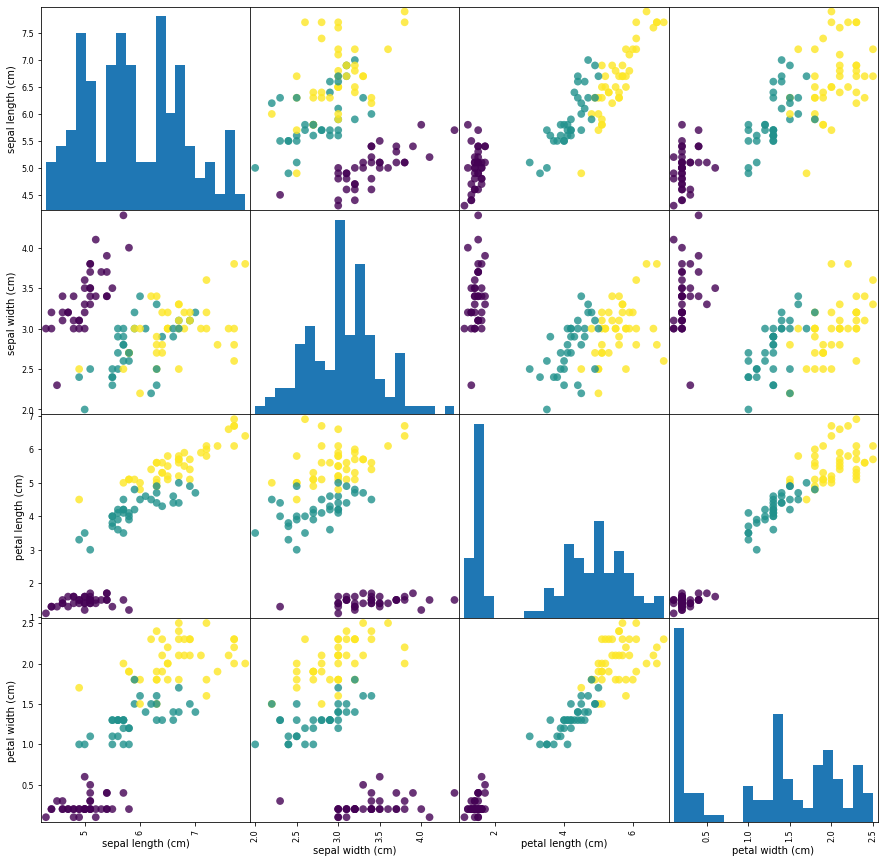

In [96]:
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
hist_kwds={'bins': 20}, s=60, alpha=.8)

From the plots, we can see that the three classes seem to be relatively well separated
using the sepal and petal measurements. This means that a machine learning model
will likely be able to learn to separate them.

## Building Your First Model: k-Nearest Neighbors

We will use a `k-nearest neighbors` classifier, which is easy to understand. 

To make a prediction for a new data point, the algorithm finds the point in the training set that is closest to the new point. Then it assigns the
label of this training point to the new data point.

All machine learning models in `scikit-learn` are implemented in their own classes,
which are called Estimator classes. The k-nearest neighbors classification algorithm
is implemented in the KNeighborsClassifier class in the neighbors module.

The most important parameter of KNeighborsClassifier is the number of neighbors, which we will set to 1:

In [97]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

The `knn` object encapsulates the algorithm that will be used to build the model from
the training data, as well the algorithm to make predictions on new data points. 

It will also hold the information that the algorithm has extracted from the training data. In the case of KNeighborsClassifier, it will just store the training set.

To build the model on the training set, we call the `fit` method of the `knn` object,
which takes as arguments the NumPy array X_train containing the training data and
the NumPy array y_train of the corresponding training labels:

In [98]:
# knn.fit(X_train, y_train)

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

## Making Predictions

Imagine we found an iris in the wild with a sepal length of 5 cm, a sepal width of 2.9 cm, a petal length of 1 cm, and a petal width of 0.2 cm.

What species of iris would this be? 

We can put this data into a NumPy array, again by calculating the shape—that is, the number of samples (1) multiplied by the number of features (4):

In [99]:
import numpy as np
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


Note that we made the measurements of this single flower into a row in a two-
dimensional NumPy array, as scikit-learn always expects two-dimensional arrays
for the data.

To make a prediction, we call the predict method of the knn object:

In [100]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


Our model predicts that this new iris belongs to the class 0, meaning its species is
setosa. 

But how do we know whether we can trust our model? We don’t know the correct species of this sample, which is the whole point of building the model!

## Evaluating the Model

This is where the test set that we created earlier comes in. 

This data was not used to build the model, but we do know what the correct species is for each iris in the test
set. Therefore, we can make a prediction for each iris in the test data and compare it
against its label (the known species). 

We can measure how well the model works by computing the accuracy, which is the fraction of flowers for which the right species was predicted:

In [101]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [102]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


We can also use the score method of the knn object, which will compute the test set
accuracy for us:

In [103]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


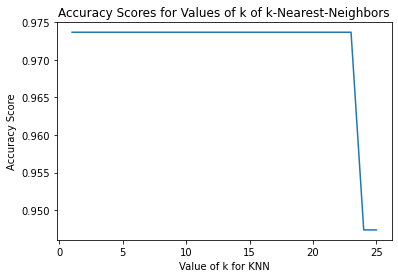

In [104]:
# experimenting with different k values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

For this model, the test set accuracy is about 0.97, which means we made the right
prediction for 97% of the irises in the test set. 

Under some mathematical assumptions, this means that we can expect our model to be correct 97% of the time for new
irises. 

# How machine learning works

Machine learning uses two types of techniques: 
* supervised learning, which trains a model on known input and output data so that it can predict future outputs,
* unsupervised learning, which finds hidden patterns or intrinsic structures in input data.

# Supervised Learning

A supervised learning algorithm takes a known set of input data and known responses to the data (output) and trains a model to generate reasonable predictions for the response to new data.

Supervised learning uses classification and regression techniques to develop predictive models.

* **Classification techniques** predict discrete responses (for example, whether an email is genuine or spam, or whether a tumor is cancerous or benign). Classification models classify input data into categories. Typical applications include medical imaging, speech recognition,and credit scoring. 
In classification, the goal is to predict a class label, which is a choice from a predefined list of possibilities.

* **Regression techniques** predict continuous responses (for example, changes in temperature or fluctuations in power demand). Typical applications include electricity load forecasting and algorithmic trading. 
For regression tasks, the goal is to predict a continuous number, or a floating-point number in programming terms (or real number in mathematical terms). 

* Regression predicts a quantity whereas classification predicts a quality.

* Use supervised learning if you have existing data for the output you are trying to predict.


# Classifications techniques 

## Binary versus Multiclass classification 

* Working on a classification problem, begin by determining whether the problem is binary or multiclass. 

* In a **binary classification problem**, a single training or test item (instance) can only be divided into two classes (ex: determine whether an email is genuine or spam). 

* In a **multiclass classification problem**, it can be divided into more than two (ex: train a model to classify an image as a dog, cat, or other animal) and leads to more complex models.

## K-Nearest Neighbors classification

* kNN categorizes objects based on the classes of their nearest neighbors in the dataset. 
* kNN predictions assume that objects near each other are similar. 
* Different distance metrics can be used to find the nearest neighbor.

To determine the closest groups or the nearest points for a query point we need some metric. 
* **Eucledian distance**
This is nothing but the cartesian distance between the two points which are in the plane/hyperplane. Euclidean distance can also be visualized as the length of the straight line that joins the two points which are into consideration. This metric helps us calculate the net displacement done between the two states of an object.

$$d\left ( x,y \right )=\sqrt{\sum_{i=1}^{n}\left ( x_i-y_i \right )^2}$$
* **Manhattan Distance**
This distance metric is generally used when we are interested in the total distance traveled by the object instead of the displacement. This metric is calculated by summing the absolute difference between the coordinates of the points in n-dimensions.

$$d\left ( x,y \right )={\sum_{i=1}^{n}\left | x_i-y_i \right |}$$

* **Minkowski Distance** We can say that the Euclidean, as well as the Manhattan distance, are special cases of the Minkowski distance.

$$d\left ( x,y \right )=\left ( {\sum_{i=1}^{n}\left ( x_i-y_i \right )^p} \right )^{\frac{1}{p}}$$

From the formula above we can say that when p = 2 then it is the same as the formula for the Euclidean distance and when p = 1 then we obtain the formula for the Manhattan distance.

### How to choose the value of k for KNN Algorithm?

The value of k is very crucial in the KNN algorithm to define the number of neighbors in the algorithm, it should be chosen based on the input data. If the input data has more outliers or noise, a higher value of k would be better. It is recommended to choose an odd value for k to avoid ties in classification. 

### Example with Sklearn librairy on breast cancer detection

#### Step 1: Importing the required Libraries

In [105]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
import seaborn as sns

#### Step 2: Reading the Dataset

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.
The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. 
For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius. 

1.ID number 

2.Diagnosis (M = malignant, B = benign) 

3-32) 

Ten real-valued features are computed for each cell nucleus: 

a)radius (mean of distances from center to points on the perimeter) 

b)texture (standard deviation of gray-scale values) 

c)perimeter 

d)area 

e)smoothness (local variation in radius lengths) 

f)compactness (perimeter^2 / area - 1.0) 

g)concavity (severity of concave portions of the contour) 

h)concave points (number of concave portions of the contour) 

i)symmetry 

j)fractal dimension ("coastline approximation" - 1) 


In [106]:
bc = pd.read_csv('cancerdata.csv',index_col= 0)

In [107]:
bc

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,14.204716,20.202641,122.80,1001.0,0.096113,0.089479,0.184766,0.096526,0.150053,...,25.380,17.33,184.60,2019.0,0.16220,0.134597,0.7119,0.120681,0.4601,0.101594
842517,M,18.483496,22.464181,132.90,1326.0,0.094443,0.063299,0.086927,0.021108,0.213798,...,24.990,23.41,158.80,1956.0,0.12380,0.529227,0.2416,0.035439,0.2750,0.079397
84300903,M,15.516300,18.271486,130.00,1203.0,0.075842,0.059376,0.132738,0.052357,0.222581,...,23.570,25.53,152.50,1709.0,0.14440,0.166906,0.4504,0.149670,0.3613,0.088802
84348301,M,15.540583,27.560108,77.58,386.1,0.091525,0.088022,0.194466,0.010895,0.179685,...,14.910,26.50,98.87,567.7,0.20980,0.224998,0.6869,0.110799,0.6638,0.086210
84358402,M,14.005198,11.678064,135.10,1297.0,0.092790,0.010642,0.030518,0.037828,0.147534,...,22.540,16.67,152.20,1575.0,0.13740,0.075833,0.4000,0.126386,0.2364,0.087483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,9.477218,17.173224,142.00,1479.0,0.110550,0.037279,0.160806,0.047462,0.157627,...,25.450,26.40,166.10,2027.0,0.14100,0.238996,0.4107,0.163526,0.2060,0.073780
926682,M,11.657306,25.502865,131.20,1261.0,0.113881,0.108912,0.134949,0.039279,0.208220,...,23.690,38.25,155.00,1731.0,0.11660,0.219149,0.3215,0.032357,0.2572,0.068449
926954,M,20.102883,14.544119,108.30,858.1,0.100213,0.003465,0.072762,0.042914,0.211039,...,18.980,34.12,126.70,1124.0,0.11390,0.279461,0.3403,0.113976,0.2218,0.098450


In [108]:
bc.shape

(569, 31)

In [109]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [110]:
bc.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.157073,19.025699,91.969033,654.889104,0.095887,0.106397,0.092388,0.048655,0.179979,0.063291,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.243948,0.272188,0.122288,0.290076,0.082584
std,3.435295,4.515361,24.298981,351.914129,0.013778,0.051773,0.082573,0.042227,0.026742,0.006770,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.156127,0.208624,0.064848,0.061867,0.018546
min,2.174108,5.225685,43.790000,143.500000,0.045915,-0.055431,-0.156186,-0.078615,0.103582,0.041265,...,7.930000,12.020000,50.410000,185.200000,0.071170,-0.198310,0.000000,-0.133583,0.156500,0.031090
25%,11.762811,15.926529,75.170000,420.300000,0.085801,0.070217,0.037784,0.020214,0.162974,0.058996,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.130946,0.114500,0.077446,0.250400,0.068561
50%,14.142920,19.135095,86.240000,551.100000,0.096244,0.105569,0.093832,0.048666,0.179796,0.062821,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.237884,0.226700,0.120702,0.282200,0.082181
75%,16.403557,22.060029,104.100000,782.700000,0.105867,0.143065,0.148154,0.077010,0.198569,0.067782,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.345980,0.382900,0.162843,0.317900,0.094202
max,24.961616,31.692291,188.500000,2501.000000,0.144596,0.248430,0.335120,0.189527,0.261135,0.087951,...,36.040000,49.540000,251.200000,4254.000000,0.222600,0.693251,1.252000,0.313149,0.663800,0.140263


In [111]:
bc['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [112]:
bc['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

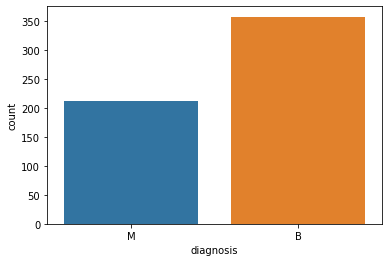

In [113]:
sns.countplot(x= "diagnosis",data= bc)

We can observe that the data set contain 569 rows and 31 columns. 
‘Diagnosis’ is the column which we are going to predict , which says if the cancer is M = malignant or B = benign. 
1 means the cancer is malignant and 0 means benign. 
We can identify that out of the 569 persons, 357 are labeled as B (benign) and 212 as M (malignant).

# Data Preparation 

In [114]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder= LabelEncoder()
bc['diagnosis'] = Label_Encoder.fit_transform(bc['diagnosis'])

In [115]:
bc['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [116]:
X= bc.drop('diagnosis',axis= 1)
Y = bc['diagnosis']

In [117]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [118]:
from sklearn.metrics import accuracy_score

# Feature Scaling

In [119]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Model Selection 

In [120]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan', p = 2)
classifier.fit(x_train, y_train)
Y2_pred = classifier.predict(x_test)
accuracy_score(y_test,Y2_pred)

0.951048951048951

In [121]:
from sklearn.model_selection import cross_val_score

accuracy_rate=[]

for i in range(1,40):
    classifier= KNeighborsClassifier(n_neighbors =i)
    score = cross_val_score(classifier,X,Y,cv=10)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy_Rate')

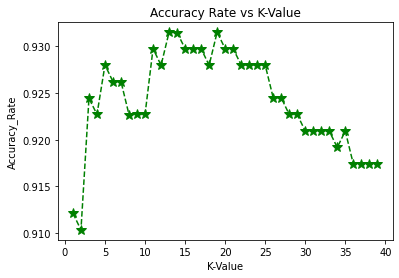

In [122]:
plt.plot(range(1,40),accuracy_rate, color= 'green',linestyle = 'dashed',marker='*', markersize=10)
plt.title('Accuracy Rate vs K-Value')
plt.xlabel('K-Value')
plt.ylabel('Accuracy_Rate')

# Regression techniques 

# Linear Regressions

In statistics, linear regression is a linear approach for modeling the relationship between a scalar dependent variable y and one or more explanatory variables (or independent variables) denoted X. The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression.

Linear regression models are often fitted using the least squares approach, but they may also be fitted in other ways, such as by minimizing the "lack of fit" in some other norm (as with least absolute deviations regression), or by minimizing a penalized version of the least squares loss function as in ridge regression ($L_2$-norm penalty) and lasso ($L_1$-norm penalty). 

## Linear Regression on US Housing Price

### Import packages and dataset

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Check basic info on the data set

In [124]:
df = pd.read_csv("USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [125]:
df.shape

(5000, 7)

In [126]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


**'describe()' method to get the statistical summary of the various features of the data set**

In [127]:
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
10%,55047.633980,4.697755,5.681951,2.310000,23502.845262,7.720318e+05
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
90%,82081.188283,7.243978,8.274222,6.100000,48813.618633,1.684621e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


**'columns' method to get the names of the columns (features)**

In [128]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

### Basic plotting and visualization on the data set

**Pairplots using seaborn**

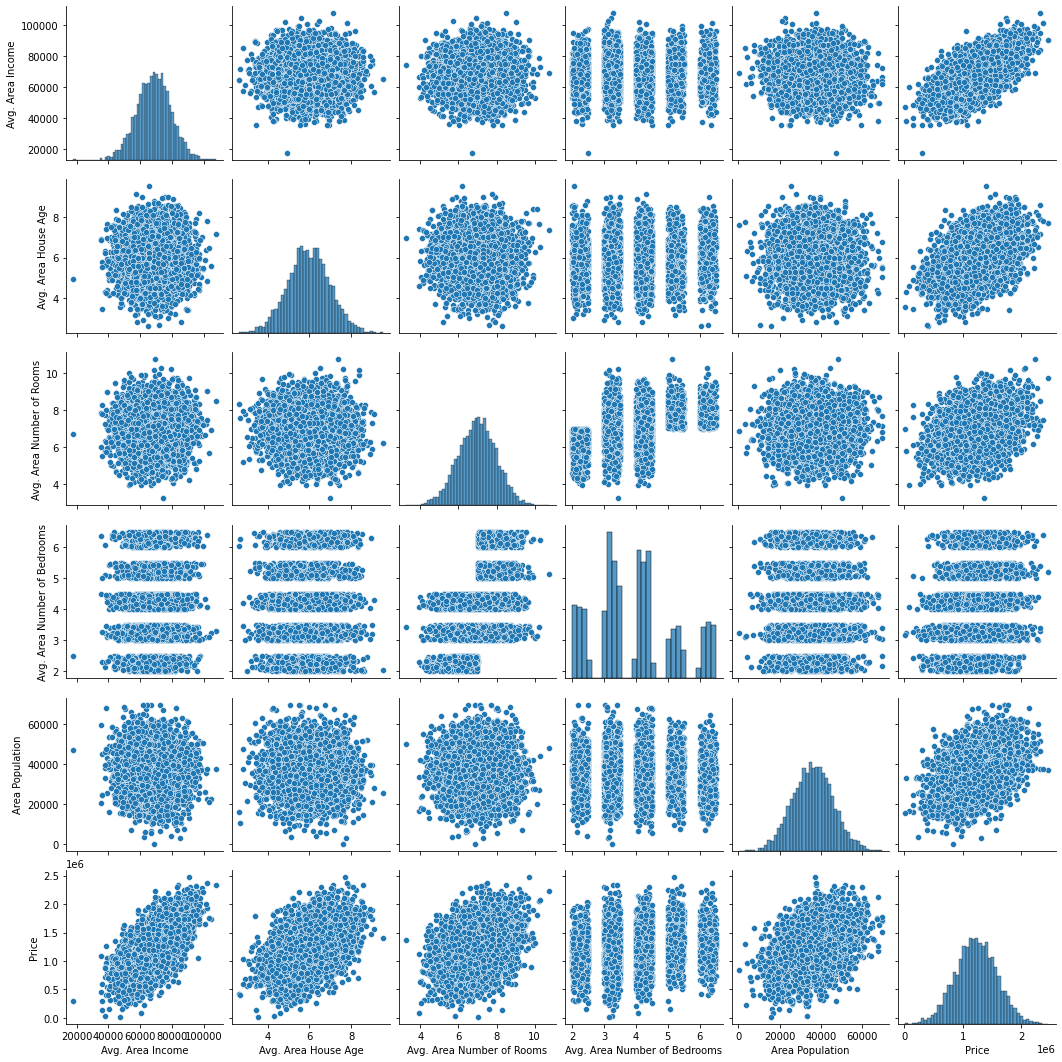

In [129]:
sns.pairplot(df)

**Distribution of price (the predicted quantity)**

<AxesSubplot:ylabel='Frequency'>

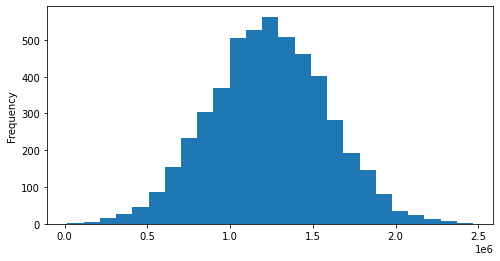

In [130]:
df['Price'].plot.hist(bins=25,figsize=(8,4))

<AxesSubplot:ylabel='Density'>

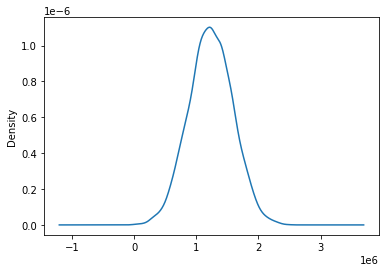

In [131]:
df['Price'].plot.density()

**Correlation matrix and heatmap**

### Feature and variable sets

**Make a list of data frame column names**

In [132]:
l_column = list(df.columns) # Making a list out of column names
len_feature = len(l_column) # Length of column vector list
l_column

['Avg. Area Income',
 'Avg. Area House Age',
 'Avg. Area Number of Rooms',
 'Avg. Area Number of Bedrooms',
 'Area Population',
 'Price',
 'Address']

**Put all the numerical features in X and Price in y, ignore Address which is string for linear regression**

In [133]:
X = df[l_column[0:len_feature-2]]
y = df[l_column[len_feature-2]]

In [134]:
print("Feature set size:",X.shape)
print("Variable set size:",y.shape)

Feature set size: (5000, 5)
Variable set size: (5000,)


In [135]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [136]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

### Test-train split

**Import train_test_split function from scikit-learn**

In [137]:
from sklearn.model_selection import train_test_split

**Create X and y train and test splits in one command using a split ratio and a random seed**

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

**Check the size and shape of train/test splits (it should be in the ratio as per test_size parameter above)**

In [139]:
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (3500, 5)
Test feature set size: (1500, 5)
Training variable set size: (3500,)
Test variable set size: (1500,)


### Model fit and training

**Import linear regression model estimator from scikit-learn and instantiate**

In [140]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [141]:
lm = LinearRegression() # Creating a Linear Regression object 'lm'

**Fit the model on to the instantiated object itself**

In [142]:
lm.fit(X_train,y_train) # Fit the linear model on to the 'lm' object itself i.e. no need to set this to another variable

LinearRegression()

**Check the intercept and coefficients and put them in a DataFrame**

In [143]:
print("The intercept term of the linear model:", lm.intercept_)

The intercept term of the linear model: -2631028.9017454907


In [144]:
print("The coefficients of the linear model:", lm.coef_)

The coefficients of the linear model: [2.15976020e+01 1.65201105e+05 1.19061464e+05 3.21258561e+03
 1.52281212e+01]


In [145]:
#idict = {'Coefficients':lm.intercept_}
#idf = pd.DataFrame(data=idict,index=['Intercept'])
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
#cdf=pd.concat([idf,cdf], axis=0)
cdf

,Coefficients
Avg. Area Income,21.597602
Avg. Area House Age,165201.104954
Avg. Area Number of Rooms,119061.463868
Avg. Area Number of Bedrooms,3212.585606
Area Population,15.228121


### Calculation of standard errors and t-statistic for the coefficients

In [146]:
n=X_train.shape[0]
k=X_train.shape[1]
dfN = n-k
train_pred=lm.predict(X_train)
train_error = np.square(train_pred - y_train)
sum_error=np.sum(train_error)
se=[0,0,0,0,0]
for i in range(k):
    r = (sum_error/dfN)
    r = r/np.sum(np.square(X_train[list(X_train.columns)[i]]-X_train[list(X_train.columns)[i]].mean()))
    se[i]=np.sqrt(r)
cdf['Standard Error']=se
cdf['t-statistic']=cdf['Coefficients']/cdf['Standard Error']
cdf

,Coefficients,Standard Error,t-statistic
Avg. Area Income,21.597602,0.160361,134.681505
Avg. Area House Age,165201.104954,1722.412068,95.912649
Avg. Area Number of Rooms,119061.463868,1696.546476,70.178722
Avg. Area Number of Bedrooms,3212.585606,1376.451759,2.333962
Area Population,15.228121,0.169882,89.639472


In [147]:
print("Therefore, features arranged in the order of importance for predicting the house price\n",'-'*90,sep='')
l=list(cdf.sort_values('t-statistic',ascending=False).index)
print(' > \n'.join(l))

Therefore, features arranged in the order of importance for predicting the house price
------------------------------------------------------------------------------------------
Avg. Area Income > 
Avg. Area House Age > 
Area Population > 
Avg. Area Number of Rooms > 
Avg. Area Number of Bedrooms


Text(0.5, 1.0, 'Area Population vs. Price')

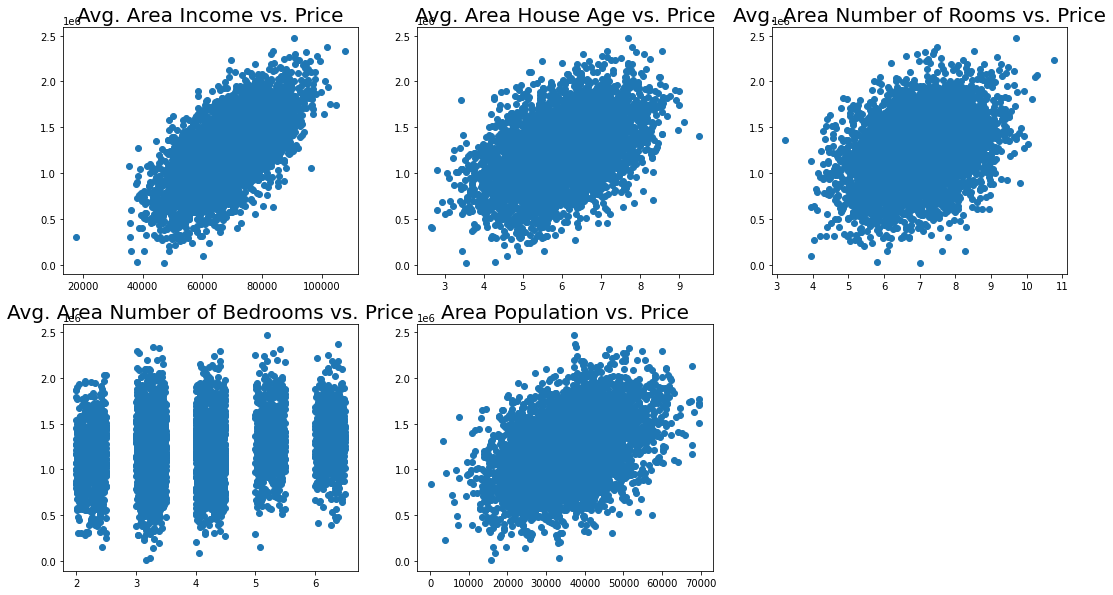

In [148]:
l=list(cdf.index)
from matplotlib import gridspec
fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(2,3)
#f, ax = plt.subplots(nrows=1,ncols=len(l), sharey=True)
ax0 = plt.subplot(gs[0])
ax0.scatter(df[l[0]],df['Price'])
ax0.set_title(l[0]+" vs. Price", fontdict={'fontsize':20})

ax1 = plt.subplot(gs[1])
ax1.scatter(df[l[1]],df['Price'])
ax1.set_title(l[1]+" vs. Price",fontdict={'fontsize':20})

ax2 = plt.subplot(gs[2])
ax2.scatter(df[l[2]],df['Price'])
ax2.set_title(l[2]+" vs. Price",fontdict={'fontsize':20})

ax3 = plt.subplot(gs[3])
ax3.scatter(df[l[3]],df['Price'])
ax3.set_title(l[3]+" vs. Price",fontdict={'fontsize':20})

ax4 = plt.subplot(gs[4])
ax4.scatter(df[l[4]],df['Price'])
ax4.set_title(l[4]+" vs. Price",fontdict={'fontsize':20})

**R-square of the model fit**

In [149]:
print("R-squared value of this fit:",round(metrics.r2_score(y_train,train_pred),3))

R-squared value of this fit: 0.917


### Prediction, error estimate, and regression evaluation matrices

**Prediction using the lm model**

In [150]:
predictions = lm.predict(X_test)
print ("Type of the predicted object:", type(predictions))
print ("Size of the predicted object:", predictions.shape)

Type of the predicted object: <class 'numpy.ndarray'>
Size of the predicted object: (1500,)


**Scatter plot of predicted price and y_test set to see if the data fall on a 45 degree straight line**

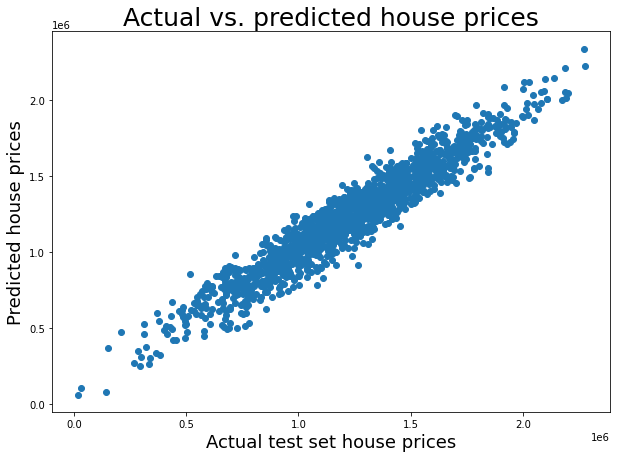

In [151]:
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted house prices",fontsize=25)
plt.xlabel("Actual test set house prices",fontsize=18)
plt.ylabel("Predicted house prices", fontsize=18)
plt.scatter(x=y_test,y=predictions)

**Plotting histogram of the residuals i.e. predicted errors (expect a normally distributed pattern)**

/home/melodie/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Histogram of residuals to check for normality'}, xlabel='Residuals', ylabel='Kernel density'>

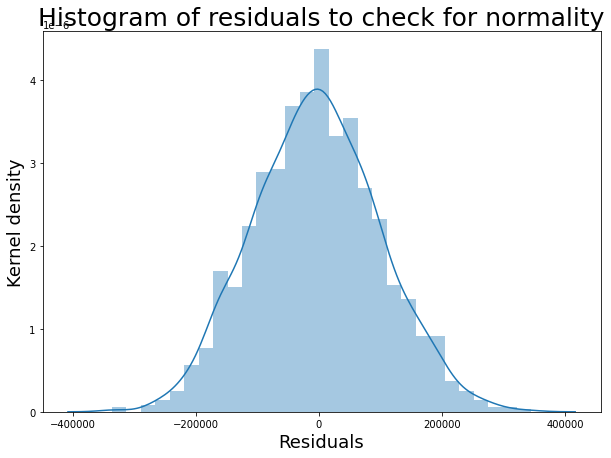

In [152]:
plt.figure(figsize=(10,7))
plt.title("Histogram of residuals to check for normality",fontsize=25)
plt.xlabel("Residuals",fontsize=18)
plt.ylabel("Kernel density", fontsize=18)
sns.distplot([y_test-predictions])

**Scatter plot of residuals and predicted values (Homoscedasticity)**

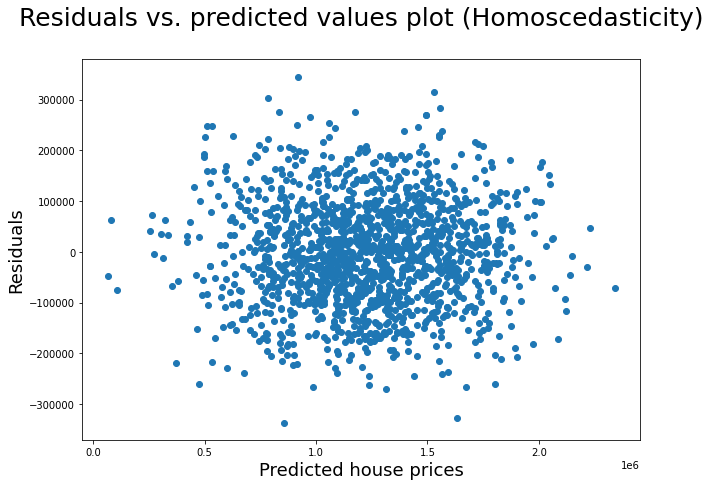

In [153]:
plt.figure(figsize=(10,7))
plt.title("Residuals vs. predicted values plot (Homoscedasticity)\n",fontsize=25)
plt.xlabel("Predicted house prices",fontsize=18)
plt.ylabel("Residuals", fontsize=18)
plt.scatter(x=predictions,y=y_test-predictions)

**Regression evaluation metrices**

In [154]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean absolute error (MAE): 81739.77482718184
Mean square error (MSE): 10489638335.804983
Root mean square error (RMSE): 102418.93543581179


**R-square value**

In [155]:
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions),3))

R-squared value of predictions: 0.919


# Lasso regression 

This is another regularized linear regression model, it works by adding a penalty term to the cost function, but it tends to zero out some features’ coefficients, which makes it useful for feature selection.

Lasso regression relies upon the linear regression model but additionaly performs a so called L1 regularization, which is a process of introducing additional information in order to prevent overfitting. As a consequence, we can fit a model containing all possible predictors and use lasso to perform variable selection by using a technique that regularizes the coefficient estimates (it shrinks the coefficient estimates towards zero). In particular, the minimization objective does not only include the residual sum of squares (RSS) - like in the OLS regression setting - but also the sum of the absolute value of coefficients.

The residual sum of squares (RSS) is calculated as follows:
$$RSS = \sum_{i=1}^{n} (y_i - \hat{y_i})^2$$
This formula can be stated as:
$$RSS = \sum_{i=1}^{n} \bigg(y_i - \big( \beta_{0} + \sum_{j=1}^{p} \beta_{j} x_{ij} \big) \bigg)^2$$
* $n$ represents the number of observations.
* $p$ denotes the number of variables that are available in the dataset.
* $x_{ij}$ represents the value of the jth variable for the ith observation, where $i = 1, 2, . . ., n$ and $j = 1, 2, . . . , p$.

In the Lasso regression, the minimization objective becomes:
$$\sum_{i=1}^{n} \bigg(y_i - \big( \beta_{0} + \sum_{j=1}^{p} \beta_{j} x_{ij} \big) \bigg)^2 + \alpha \sum_{j=1}^{p} |\beta_j|$$
which equals:
$$RSS + \alpha \sum_{j=1}^{p} |\beta_j|$$
$\alpha$ can take various values:
* $\alpha = 0$: Same coefficients as least squares linear regression
* $\alpha = \infty$: All coefficients are zero
* $0 < \alpha < \infty$: coefficients are between 0 and that of least squares linear regression

Lasso regression’s advantage over least squares linear regression is rooted in the bias-variance trade-off. As 
$\alpha$ increases, the flexibility of the Lasso regression fit decreases, leading to decreased variance but increased bias. This procedure is more restrictive in estimating the coefficients and depending on your value of 
$\alpha$-may set a number of them to exactly zero. This means in the final model the response variable will only be related to a small subset of the predictors—namely, those with nonzero coeffcient estimates. Therefore, selecting a good value of $\alpha$ is critical.

In [156]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error


In [157]:
df = pd.read_csv("https://raw.githubusercontent.com/kirenz/datasets/master/Hitters.csv")
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

Note that the salary is missing for some of the players:

In [159]:
print(df.isnull().sum())

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64


We simply drop the missing cases:

In [160]:
df = df.dropna()

Since we will use the Lasso algorithm from scikit learn, we need to encode our categorical features as one-hot numeric features (dummy variables. A dummy variable is a binary variable that takes a value of 0 or 1. One adds such variables to a regression model to represent factors which are of a binary nature i.e. they are either observed or not observed.):

In [161]:
dummies = pd.get_dummies(df[['League', 'Division','NewLeague']])
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   League_A     263 non-null    uint8
 1   League_N     263 non-null    uint8
 2   Division_E   263 non-null    uint8
 3   Division_W   263 non-null    uint8
 4   NewLeague_A  263 non-null    uint8
 5   NewLeague_N  263 non-null    uint8
dtypes: uint8(6)
memory usage: 3.6 KB


In [162]:
print(dummies.head())

   League_A  League_N  Division_E  Division_W  NewLeague_A  NewLeague_N
1         0         1           0           1            0            1
2         1         0           0           1            1            0
3         0         1           1           0            0            1
4         0         1           1           0            0            1
5         1         0           0           1            1            0


Next, we create our label y:

In [163]:
y = df['Salary']

We drop the column with the outcome variable (Salary), and categorical columns for which we already created dummy variables:

In [164]:
X_numerical = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

Make a list of all numerical features (we need them later):

In [165]:
list_numerical = X_numerical.columns
list_numerical

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors'],
      dtype='object')

In [166]:
# Create all features
X = pd.concat([X_numerical, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        263 non-null    float64
 1   Hits         263 non-null    float64
 2   HmRun        263 non-null    float64
 3   Runs         263 non-null    float64
 4   RBI          263 non-null    float64
 5   Walks        263 non-null    float64
 6   Years        263 non-null    float64
 7   CAtBat       263 non-null    float64
 8   CHits        263 non-null    float64
 9   CHmRun       263 non-null    float64
 10  CRuns        263 non-null    float64
 11  CRBI         263 non-null    float64
 12  CWalks       263 non-null    float64
 13  PutOuts      263 non-null    float64
 14  Assists      263 non-null    float64
 15  Errors       263 non-null    float64
 16  League_N     263 non-null    uint8  
 17  Division_W   263 non-null    uint8  
 18  NewLeague_N  263 non-null    uint8  
dtypes: float

### Split data

Split the data set into train and test set with the first 70% of the data for training and the remaining 30% for testing.

In [167]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [168]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
260,496.0,119.0,8.0,57.0,33.0,21.0,7.0,3358.0,882.0,36.0,365.0,280.0,165.0,155.0,371.0,29.0,1,1,1
92,317.0,78.0,7.0,35.0,35.0,32.0,1.0,317.0,78.0,7.0,35.0,35.0,32.0,45.0,122.0,26.0,0,0,0
137,343.0,103.0,6.0,48.0,36.0,40.0,15.0,4338.0,1193.0,70.0,581.0,421.0,325.0,211.0,56.0,13.0,0,0,0
90,314.0,83.0,13.0,39.0,46.0,16.0,5.0,1457.0,405.0,28.0,156.0,159.0,76.0,533.0,40.0,4.0,0,1,0
100,495.0,151.0,17.0,61.0,84.0,78.0,10.0,5624.0,1679.0,275.0,884.0,1015.0,709.0,1045.0,88.0,13.0,0,0,0


### Standardization

Lasso performs best when all numerical features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

This means it is important to standardize our features. We do this by subtracting the mean from our observations and then dividing the difference by the standard deviation. This so called standard score 
$z$ for an observation $x$
 is calculated as:
$$z = \frac{(x- \bar x)}{s}$$
 where:
* $x$ is an observation in a feature
* $\bar{x}$ is the mean of that feature
* $s$ is the standard deviation of that feature.

To avoid data leakage, the standardization of numerical features should always be performed after data splitting and only from training data. Furthermore, we obtain all necessary statistics for our features (mean and standard deviation) from training data and also use them on test data. Note that we don’t standardize our dummy variables (which only have values of 0 or 1).

In [169]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train[list_numerical]) 

X_train[list_numerical] = scaler.transform(X_train[list_numerical])

X_test[list_numerical] = scaler.transform(X_test[list_numerical])

In [170]:
X_train

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
260,0.644577,0.257439,-0.456963,0.101010,-0.763917,-0.975959,-0.070553,0.298535,0.239063,-0.407836,0.011298,-0.163736,-0.361084,-0.482387,1.746229,3.022233,1,1,1
92,-0.592807,-0.671359,-0.572936,-0.778318,-0.685806,-0.458312,-1.306911,-1.001403,-0.969702,-0.746705,-0.957639,-0.898919,-0.844319,-0.851547,0.022276,2.574735,0,0,0
137,-0.413075,-0.105019,-0.688910,-0.258715,-0.646751,-0.081841,1.577925,0.717456,0.706633,-0.010542,0.645511,0.259369,0.220252,-0.294452,-0.434676,0.635577,0,0,0
90,-0.613545,-0.558091,0.122907,-0.618440,-0.256196,-1.211253,-0.482672,-0.514087,-0.478077,-0.501317,-0.602362,-0.526826,-0.684451,0.786178,-0.545452,-0.706917,0,1,0
100,0.637665,0.982354,0.586803,0.260888,1.227914,1.706394,0.547626,1.267183,1.437305,2.384908,1.535171,2.041811,1.615457,2.504446,-0.213124,0.635577,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,0.824309,0.733164,0.470829,0.740521,0.954525,0.859335,-0.688732,-0.824858,-0.808834,-0.571428,-0.787341,-0.685866,-0.648118,3.427344,0.326910,1.232241,1,0,1
196,0.423369,0.461321,1.862516,0.500704,1.618469,0.482865,1.165805,1.354814,1.246368,1.625375,1.112362,1.516681,0.681687,-1.002566,-0.822392,-1.303581,0,1,0
159,1.474109,1.254197,1.746542,1.140215,2.126191,-0.458312,-0.894792,-0.522636,-0.520174,-0.068968,-0.528958,-0.322776,-0.662651,-0.633407,1.310048,0.933909,0,1,0
17,-1.470728,-1.396275,-1.152806,-1.217982,-1.740306,-1.258312,-0.482672,-0.932153,-0.933620,-0.770075,-0.869554,-0.934928,-0.818885,-0.660255,0.403069,1.083075,0,1,0


### Lasso regression

First, we apply lasso regression on the training set with an arbitrarily regularization parameter $\alpha$ of 1.

In [171]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=1)
reg.fit(X_train, y_train)

Lasso(alpha=1)

### Model evaluation

We print the $R^2$ score for the training and test set.

In [172]:
print('R squared training set', round(reg.score(X_train, y_train)*100, 2))
print('R squared test set', round(reg.score(X_test, y_test)*100, 2))

R squared training set 60.43
R squared test set 33.01


MSE for the training and test set.

In [173]:
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 2))

# Test data
pred = reg.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
print('MSE test set', round(mse_test, 2))

MSE training set 80571.73
MSE test set 134426.33


### Role of alpha

To better understand the role of alpha, we plot the lasso coefficients as a function of alpha (max_iter are the maximum number of iterations):

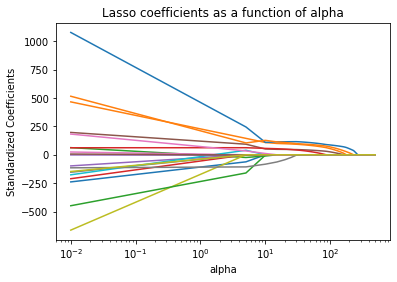

In [174]:
import numpy as np
import matplotlib.pyplot as plt

alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

Remember that if alpha = 0, then the Lasso gives the least squares fit, and when alpha becomes very large, the lasso gives the null model in which all coefficient estimates equal zero.

Moving from left to right in our plot, we observe that at first the Lasso models contains many predictors with high magnitudes of coefficient estimates. With increasing alpha, the coefficient estimates approximate towards zero.

Next, we use cross-validation to find the best value for alpha.

### Lasso with optimal alpha

To find the optimal value of alpha, we use scikit learns lasso linear model with iterative fitting along a regularization path (LassoCV). The best model is selected by cross-validation.

#### k-fold cross validation

In [175]:
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
model = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model.fit(X_train, y_train)

LassoCV(cv=5, max_iter=10000, random_state=0)

Show best value of penalization chosen by cross validation:

In [176]:
model.alpha_

2.3441244939374584

#### Best model

Use best value for our final model:

In [177]:
# Set best alpha
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X_train, y_train)

Lasso(alpha=2.3441244939374584)

Show model coefficients and names:

In [178]:
print(list(zip(lasso_best.coef_, X)))

[(-176.45309657050367, 'AtBat'), (271.2333327634519, 'Hits'), (-13.04949222304172, 'HmRun'), (-48.97878412496708, 'Runs'), (-13.83696437015512, 'RBI'), (140.12896436568226, 'Walks'), (-10.616534012349028, 'Years'), (-0.0, 'CAtBat'), (0.0, 'CHits'), (78.65781330867236, 'CHmRun'), (355.66188056426284, 'CRuns'), (60.50548334807058, 'CRBI'), (-262.7512352402532, 'CWalks'), (65.61587416521267, 'PutOuts'), (-0.14505342495248086, 'Assists'), (-1.2293157493169844, 'Errors'), (99.66112742179934, 'League_N'), (-116.8640556916492, 'Division_W'), (-69.87497671182548, 'NewLeague_N')]


### Model evaluation

In [179]:
print('R squared training set', round(lasso_best.score(X_train, y_train)*100, 2))
print('R squared test set', round(lasso_best.score(X_test, y_test)*100, 2))

R squared training set 59.18
R squared test set 35.48


In [180]:
mean_squared_error(y_test, lasso_best.predict(X_test))

129468.59746481004

Lasso path: plot results of cross-validation with mean squared erros (for more information about the plot visit the scikit-learn documentation)

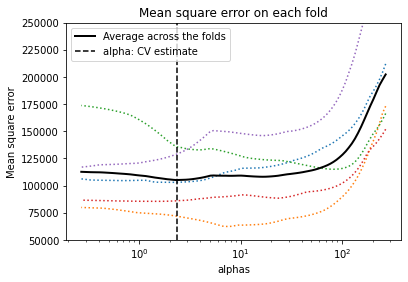

In [181]:
plt.semilogx(model.alphas_, model.mse_path_, ":")
plt.plot(
    model.alphas_ ,
    model.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    model.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

ymin, ymax = 50000, 250000
plt.ylim(ymin, ymax);

# Unsupervised learning

Unsupervised learning is a class of machine learning techniques used to find patterns in data. The data given to unsupervised algorithms is not labelled, which means only the input variables (x) are given with no corresponding output variables. In unsupervised learning, the algorithms are left to discover interesting structures in the data on their own.

**Clustering** is the most common unsupervised learning technique.
It is used for exploratory data analysis to find hidden patterns or
groupings in data.

Applications for clustering include gene sequence analysis, market research, and object recognition.

In cluster analysis, data is partitioned into groups based on some
measure of similarity or shared characteristic. Clusters are formed
so that objects in the same cluster are very similar and objects in
different clusters are very distinct.

Clustering algorithms fall into two broad groups:
* Hard clustering, where each data point belongs to only one cluster (K-means, K-medoids, Hierarchical Clustering, ...)
* Soft clustering, where each data point can belong to more than one cluster (Fuzzy c-Means, Gaussian Mixture Model, ...)

You can use hard or soft clustering techniques if you already know
the possible data groupings.

If you don’t yet know how the data might be grouped:
* Use self-organizing feature maps or hierarchical clustering to look for possible structures in the data.
* Use cluster evaluation to look for the “best” number of groups for a given clustering algorithm.

# K Means Clustering

The $K$-means algorithm divides a set of $N$ samples $X$ into $K$ disjoint clusters $C$, each described by the mean $\mu_j$ of the samples in the cluster. The means are commonly called the **cluster “centroids”**; note that they are not, in general, points from $X$, although they live in the same space. The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum of squared criterion:

$$\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_j - \mu_i||^2)$$

## How the algorithm works

The Κ-means clustering algorithm uses iterative refinement to produce a final result. The algorithm inputs are the number of clusters $Κ$ and the data set. The data set is a collection of features for each data point. The algorithms starts with initial estimates for the $Κ$ centroids, which can either be randomly generated or randomly selected from the data set. The algorithm then iterates between two steps:

**Data assigment step**: Each centroid defines one of the clusters. In this step, each data point is assigned to its nearest centroid, based on the squared Euclidean distance. More formally, if $c_i$ is the collection of centroids in set $C$, then each data point $x$ is assigned to a cluster based on

$$\underset{c_i \in C}{\arg\min} \; dist(c_i,x)^2$$
where dist( · ) is the standard ($L_2$) Euclidean distance. Let the set of data point assignments for each ith cluster centroid be $S_i$.

**Centroid update step**: In this step, the centroids are recomputed. This is done by taking the mean of all data points assigned to that centroid's cluster.

$$c_i=\frac{1}{|S_i|}\sum_{x_i \in S_i x_i}$$

The algorithm iterates between steps one and two until a stopping criteria is met (i.e., no data points change clusters, the sum of the distances is minimized, or some maximum number of iterations is reached).

** Convergence and random initialization **

This algorithm is guaranteed to converge to a result. The result may be a local optimum (i.e. not necessarily the best possible outcome), meaning that assessing more than one run of the algorithm with randomized starting centroids may give a better outcome.

<img src=https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif style="width: 500px;"/>

## The Data

For this project we will attempt to use KMeans Clustering to cluster Universities into to two groups, Private and Public. We will use a data frame with 777 observations on the following 18 variables.

* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

In [182]:
### Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

** Read in the College_Data file using read_csv. Figure out how to set the first column as the index.**

In [183]:
df = pd.read_csv('College_Data',index_col=0)

**Check the head of the data**

In [184]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


** Check the info() and describe() methods on the data.**

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [186]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## Exploratory Analysis

** Create a scatterplot of Grad.Rate versus Room.Board (and their linear fit) where the points are colored by the Private column. **

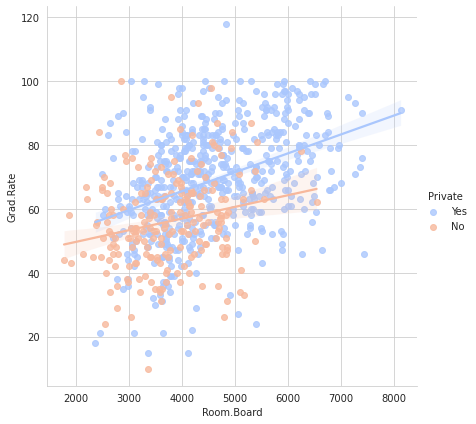

In [187]:
sns.set_style('whitegrid')
sns.lmplot(data=df, x="Room.Board",y="Grad.Rate", hue='Private',
           palette='coolwarm',height=6,aspect=1,fit_reg=True)

Create a scatterplot of F.Undergrad versus Outstate where the points are colored by the Private column.

The plot shows that these two feature dimensions separate out baed on the type of college



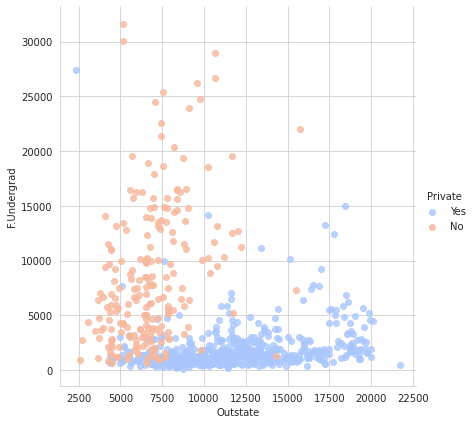

In [188]:
sns.set_style('whitegrid')
sns.lmplot(x='Outstate',y='F.Undergrad',data=df, hue='Private',
           palette='coolwarm',height=6,aspect=1,fit_reg=False)

** Create a boxplot of student-faculty ratio based on college type**

<AxesSubplot:xlabel='Private', ylabel='S.F.Ratio'>

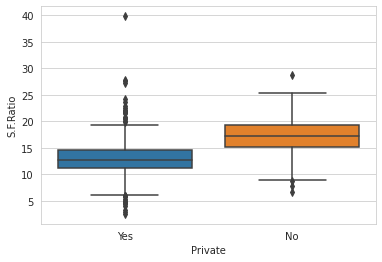

In [189]:
sns.boxplot(x='Private',y='S.F.Ratio',data=df)

** Create a boxplot of percent of alumni who donate based on college type**

<AxesSubplot:xlabel='Private', ylabel='perc.alumni'>

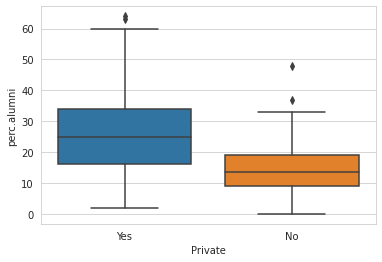

In [190]:
sns.boxplot(x='Private',y='perc.alumni',data=df)

** Create a stacked histogram showing Out of State Tuition based on the Private column.**

/home/melodie/miniconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/melodie/miniconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


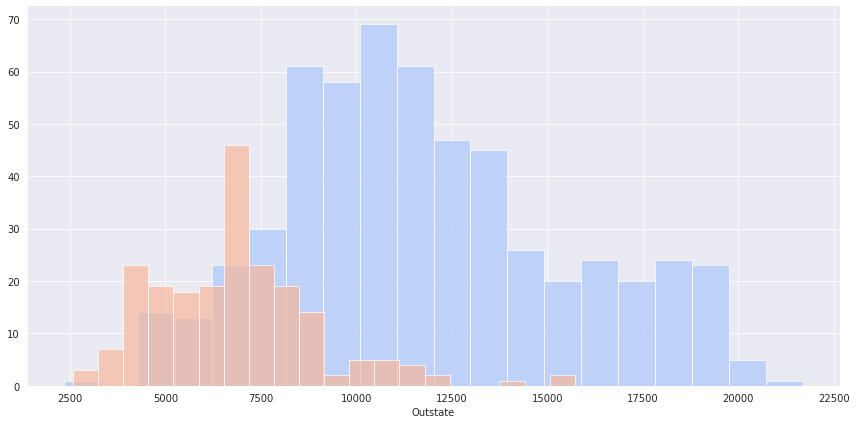

In [191]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',height=6,aspect=2)
g = g.map(plt.hist,'Outstate',bins=20,alpha=0.7)

**Create a similar histogram for the Grad.Rate column.**

/home/melodie/miniconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/melodie/miniconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


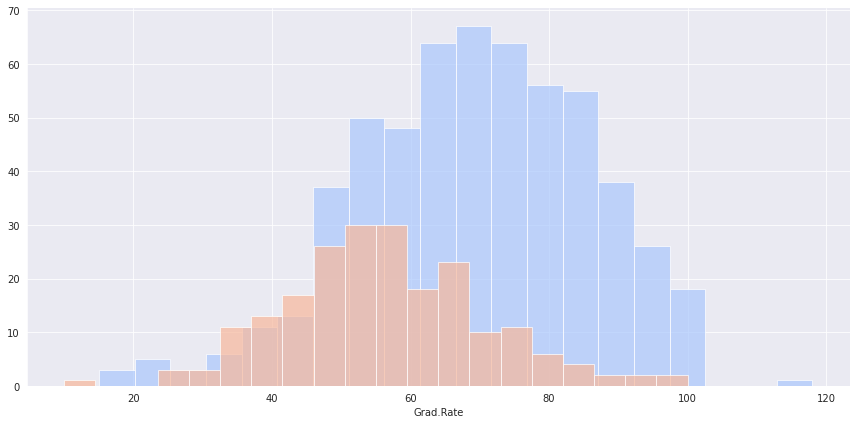

In [192]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',height=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

**There seems to be a private school with a graduation rate of higher than 100%**

In [193]:
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


** Set that school's graduation rate to 100 so it makes sense. You may get a warning not an error) when doing this operation, so use dataframe operations or just re-do the histogram visualization to make sure it actually went through.**

In [194]:
df['Grad.Rate']['Cazenovia College'] = 100

/tmp/ipykernel_25213/2087630962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grad.Rate']['Cazenovia College'] = 100


In [195]:
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


/home/melodie/miniconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/melodie/miniconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


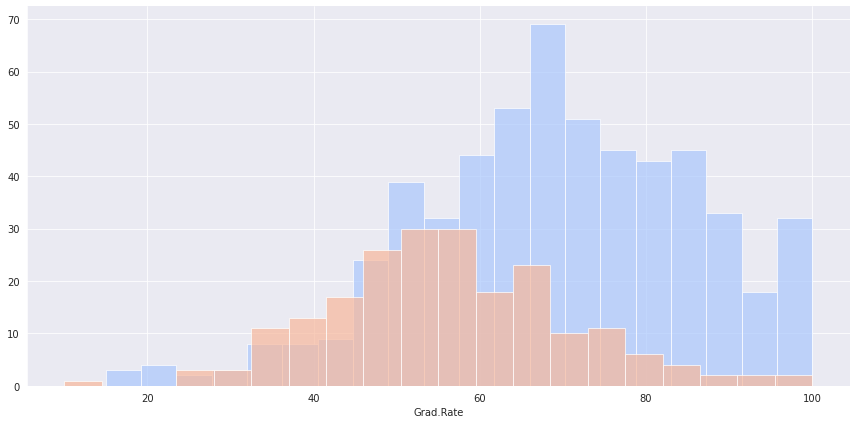

In [196]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',height=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

## K Means Cluster Creation

** Import KMeans from SciKit Learn.**

In [197]:
from sklearn.cluster import KMeans

** Create an instance of a K Means model with 2 clusters.**

In [198]:
kmeans = KMeans(n_clusters=2,verbose=0,tol=1e-3,max_iter=300,n_init=20)

**Fit the model to all the data except for the Private label.**

In [199]:
kmeans.fit(df.drop('Private',axis=1))

KMeans(n_clusters=2, n_init=20, tol=0.001)

** What are the cluster center vectors?**

In [200]:
clus_cent=kmeans.cluster_centers_
clus_cent

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

**Now compare these cluster centers (for all dimensions/features) to the known means of labeled data**

In [201]:
df[df['Private']=='Yes'].describe() # Statistics for private colleges only

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000
mean,1977.929204,1305.702655,456.945133,29.330973,56.957522,1872.168142,433.966372,11801.693805,4586.143363,547.506195,1214.440708,71.093805,78.534513,12.945487,25.890265,10486.353982,68.966372
std,2443.341319,1369.549478,457.529136,17.851391,19.588360,2110.661773,722.370487,3707.470822,1089.697557,174.932303,632.879647,17.350886,15.450251,3.518573,12.400755,5682.576587,16.673032
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,2370.000000,250.000000,250.000000,8.000000,24.000000,2.500000,2.000000,3186.000000,15.000000
25%,619.000000,501.000000,206.000000,17.000000,42.000000,840.000000,63.000000,9100.000000,3736.000000,450.000000,800.000000,60.000000,68.000000,11.100000,16.000000,7477.000000,58.000000
50%,1133.000000,859.000000,328.000000,25.000000,55.000000,1274.000000,207.000000,11200.000000,4400.000000,500.000000,1100.000000,73.000000,81.000000,12.700000,25.000000,8954.000000,69.000000
75%,2186.000000,1580.000000,520.000000,36.000000,70.000000,2018.000000,541.000000,13970.000000,5400.000000,600.000000,1500.000000,85.000000,92.000000,14.500000,34.000000,11625.000000,81.000000
max,20192.000000,13007.000000,4615.000000,96.000000,100.000000,27378.000000,10221.000000,21700.000000,8124.000000,2340.000000,6800.000000,100.000000,100.000000,39.800000,64.000000,56233.000000,100.000000


In [202]:
df[df['Private']=='No'].describe() # Statistics for public colleges only

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,5729.919811,3919.287736,1640.872642,22.834906,52.702830,8571.004717,1978.188679,6813.410377,3748.240566,554.377358,1676.981132,76.834906,82.816038,17.139151,14.358491,7458.316038,56.042453
std,5370.675335,3477.266276,1261.592009,16.180443,20.091058,6467.696087,2321.034696,2145.248389,858.139928,135.729935,677.515680,12.317525,12.069669,3.418049,7.518935,2695.541611,14.583412
min,233.000000,233.000000,153.000000,1.000000,12.000000,633.000000,9.000000,2580.000000,1780.000000,96.000000,400.000000,33.000000,33.000000,6.700000,0.000000,3605.000000,10.000000
25%,2190.750000,1563.250000,701.750000,12.000000,37.000000,3601.000000,600.000000,5366.000000,3121.500000,500.000000,1200.000000,71.000000,76.000000,15.100000,9.000000,5715.000000,46.000000
50%,4307.000000,2929.500000,1337.500000,19.000000,51.000000,6785.500000,1375.000000,6609.000000,3708.000000,550.000000,1649.000000,78.500000,86.000000,17.250000,13.500000,6716.500000,55.000000
75%,7722.500000,5264.000000,2243.750000,27.500000,65.000000,12507.000000,2495.250000,7844.000000,4362.000000,612.000000,2051.250000,86.000000,92.000000,19.325000,19.000000,8570.250000,65.000000
max,48094.000000,26330.000000,6392.000000,95.000000,100.000000,31643.000000,21836.000000,15732.000000,6540.000000,1125.000000,4288.000000,103.000000,100.000000,28.800000,48.000000,16527.000000,100.000000


**Create a data frame with cluster centers and with column names borrowed from the original data frame**

**Is it clear from this data frame which label corresponds to private college (0 or 1)?**

In [203]:
df_desc=pd.DataFrame(df.describe())
feat = list(df_desc.columns)
kmclus = pd.DataFrame(clus_cent,columns=feat)
kmclus

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1813.234679,1287.165919,491.044843,25.309417,53.470852,2188.548580,595.458894,10395.708520,4311.364723,541.982063,1280.336323,70.442451,77.825112,14.099701,23.174888,8932.046338,65.092676
1,10363.138889,6550.898148,2569.722222,41.490741,70.203704,13061.935185,2464.861111,10719.175926,4643.472222,595.212963,1714.203704,86.398148,91.333333,14.027778,20.074074,14170.500000,67.592593


**What are the cluster labels?**

In [204]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Evaluation

There is no perfect way to evaluate clustering if you don't have the labels, however since this is just an exercise, we do have the labels, so we take advantage of this to evaluate our clusters, keep in mind, you usually won't have this luxury in the real world.

** Create a new column for df called 'Cluster', which is a 1 for a Private school, and a 0 for a public school.**

In [205]:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

In [206]:
df1=df # Create a copy of data frame so that original data frame does not get 'corrupted' with the cluster index
df1['Cluster'] = df['Private'].apply(converter)

In [207]:
df1.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


** Create a confusion matrix and classification report to see how well the Kmeans clustering worked without being given any labels.**

In [208]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df1['Cluster'],kmeans.labels_))
print(classification_report(df1['Cluster'],kmeans.labels_))

[[138  74]
 [531  34]]
              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777



## Clustering performance (e.g. distance between centroids)

**Create two data frames consisting of only private or public university data**

In [209]:
df_pvt=df[df['Private']=='Yes']
df_pub=df[df['Private']=='No']

**Play with parameters such as max_iter and n_init and calculate cluster centroid distances**

In [210]:
kmeans = KMeans(n_clusters=2,verbose=0,tol=1e-3,max_iter=50,n_init=10)
kmeans.fit(df.drop('Private',axis=1))
clus_cent=kmeans.cluster_centers_
df_desc=pd.DataFrame(df.describe())
feat = list(df_desc.columns)
kmclus = pd.DataFrame(clus_cent,columns=feat)
a=np.array(kmclus.diff().iloc[1])
centroid_diff = pd.DataFrame(a,columns=['K-means cluster centroid-distance'],index=df_desc.columns)
centroid_diff['Mean of corresponding entity (private)']=np.array(df_pvt.mean())
centroid_diff['Mean of corresponding entity (public)']=np.array(df_pub.mean())
centroid_diff

/tmp/ipykernel_25213/2546318630.py:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  centroid_diff['Mean of corresponding entity (private)']=np.array(df_pvt.mean())
/tmp/ipykernel_25213/2546318630.py:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  centroid_diff['Mean of corresponding entity (public)']=np.array(df_pub.mean())


,K-means cluster centroid-distance,Mean of corresponding entity (private),Mean of corresponding entity (public)
Apps,8549.904210,1977.929204,5729.919811
Accept,5263.732229,1305.702655,3919.287736
Enroll,2078.677379,456.945133,1640.872642
Top10perc,16.181324,29.330973,22.834906
Top25perc,16.732852,56.957522,52.702830
F.Undergrad,10873.386605,1872.168142,8571.004717
P.Undergrad,1869.402217,433.966372,1978.188679
Outstate,323.467406,11801.693805,6813.410377
Room.Board,332.107499,4586.143363,3748.240566
Books,53.230900,547.506195,554.377358
